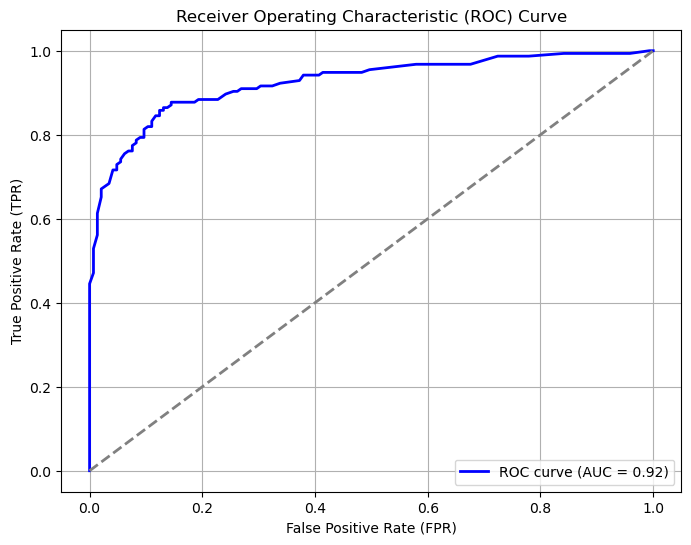

In [1]:
#ROC curve and AUC curve
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, auc


X, y = make_classification(n_samples=1000, n_features=20, n_classes=2, random_state=42)


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)


y_prob = model.predict_proba(X_test)[:, 1]

# Computing the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

# Compute the AUC
roc_auc = auc(fpr, tpr)

# Ploting of ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', lw=2)  # Random guessing line
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid()
plt.show()
